# Exploring the NFL

In [295]:
import nflgame
import numpy as np
#games = nflgame.games(range(2009,2017))

In [2]:
games = nflgame.games(range(2009,2017))
#print len(games)

## Looking play by play

### Tackles by game time

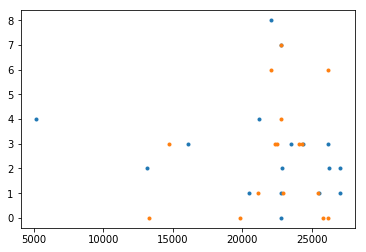

In [135]:
#I'm graphing something at least
def getTacklesByTime(game, team='home'):
    playKeys = game.data[team]['stats']['defense'].keys() #Times of defensive plays
    tackles = []
    for i in playKeys:
        tackles.append(game.data[team]['stats']['defense'][i]['tkl'])
    homeDP = [int(i.replace('-','')) for i in playKeys] 

    combo = sorted(zip(homeDP, tackles))
    return zip(*combo)

time, tackles = getTacklesByTime(games[100])
time2, tackles2 = getTacklesByTime(games[100], team = 'away')
plt.plot(time, tackles, '.')
plt.plot(time2, tackles2, '.')
plt.show()

## Net yards as game progresses

Average home yards per play is 23.320513 from SD
Average away yards per play is 24.525773 from CIN
Winner is SD


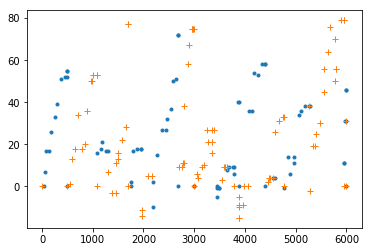

In [347]:
#print(games[100].data['drives']['1']['plays'])

def timePlays(game):
    times = []
    plays = []
    for play in game.drives.plays():
        if play.data['time'] == '': continue
        times.append(6000 - 1500*(4-int(play.data['qtr'])) - int(play.data['time'].replace(':','')))
        plays.append(play)
    return times, plays

def getYards(game): #Returns times, yards, and whether it was a home or away
    times, plays = timePlays(game)
    indexHome = []
    indexAway = []

    yards = [None]*len(plays)
    for i in range(0, len(plays)):
        if(plays[i].team == game.home): indexHome.append(i)
        else: indexAway.append(i)
        yards[i] = plays[i].data['ydsnet']
    return times, plays, yards, indexHome, indexAway

toAnalyze = games[220]

times, plays, yards, indexHome, indexAway = getYards(toAnalyze)


plt.plot([times[i] for i in indexHome], [yards[i] for i in indexHome], '.')
plt.plot([times[i] for i in indexAway], [yards[i] for i in indexAway], '+')

print("Average home yards per play is %f from %s" % (np.mean([yards[i] for i in indexHome]), toAnalyze.home))
print("Average away yards per play is %f from %s" % (np.mean([yards[i] for i in indexAway]), toAnalyze.away))
print("Winner is %s" % toAnalyze.winner)
plt.show()